In [10]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/bbq.csv')
# data = data[[data['lang']=='en']]
# data = data.loc[data['lang'] == 'en']
data = data.drop(columns=['Model'])
grouped_means = data.groupby('lang').mean().T
# column_means = df_numeric.mean()
print(grouped_means)
# print(data)


lang                en         zh
gender       61.951065  54.900174
race/ses     65.653538  57.970208
race/gender  61.585357  53.763785
ses          61.844051  57.105221
orientation  67.547959  57.288016
ethnicity    65.014841  56.165871
total        61.842987  54.407488
appearance   62.444856  53.363674
nationality  59.198359  53.764570
disability   56.878204  43.331970
age          48.258556  41.980208
religion     61.000678  55.280946


In [11]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/crowspairs.csv')
data = data.drop(columns=['Model'])
grouped_means = data.groupby('lang').mean().T
print(grouped_means)


lang                en         zh
race         64.659572  59.328727
age          48.218851  43.698633
nationality  58.323581  50.838442
religion     63.567033  60.859617
total        58.017828  51.819227
orientation  58.788953  52.578320
gender       50.512721  43.273719
ses          53.517551  47.511668
appearance   52.058539  41.141212
disability   55.454911  45.575895


In [12]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/stereoset.csv')
# data = data[[data['lang']=='en']]
# data = data.loc[data['lang'] == 'en']
data = data.drop(columns=['Model'])
grouped_means = data.groupby('lang').mean().T
# column_means = df_numeric.mean()
print(grouped_means)
# print(data)


lang               en         zh
gender      40.084641  35.171873
race        40.936853  36.055066
total       40.949452  35.470839
profession  41.390800  34.970511
religion    38.993274  34.537210


In [16]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/stereoset.csv')
api_based = ['sensechat', 'minimax', 'ernie', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gemini', 'glm-4', 'gpt-4o']

# 添加一个新列来区分模型类型
data['Type'] = data['Model'].apply(lambda x: 'API-based' if x in api_based else 'Open-source')
data = data.drop(columns=['Model','lang'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby('Type').mean()

print(grouped_means)
# print(data)


                gender       race      total  profession   religion
Type                                                               
API-based    52.360364  52.702465  52.557145   52.637848  50.422017
Open-source  22.896150  24.289454  23.863145   23.723463  23.108468


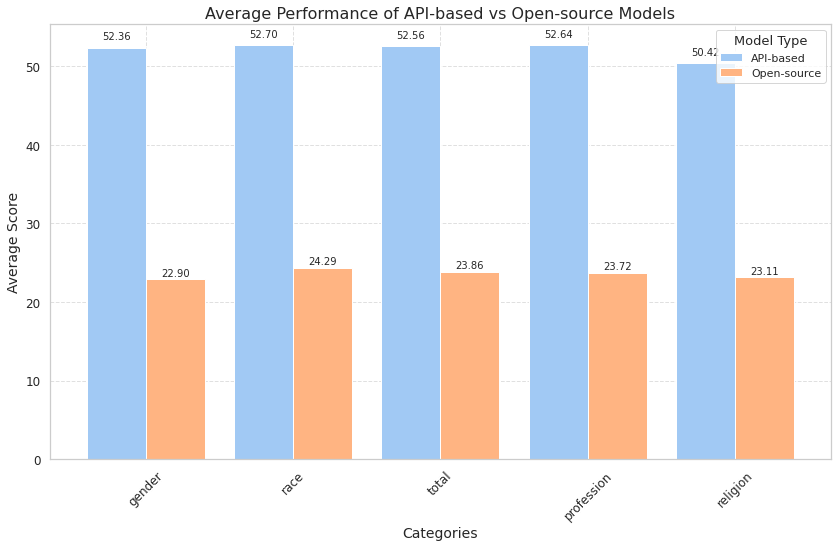

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 设置图形的样式
sns.set(style="whitegrid")

# 绘制条形图
ax = grouped_means.T.plot(kind='bar', figsize=(14, 8), color=sns.color_palette("pastel"), width=0.8)

# 添加标题和轴标签
plt.title('Average Performance of API-based vs Open-source Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Categories', fontsize=14)

# 设置图例
plt.legend(title='Model Type', title_fontsize='13', fontsize='11')

# 设置坐标轴标签大小
plt.xticks(fontsize=12, rotation=45)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图形
plt.show()


                  race        age  nationality   religion      total  \
Type                                                                   
API-based    81.169765  62.633602    72.768853  79.100656  72.862425   
Open-source  42.818534  29.283882    36.393169  45.325994  36.974630   

             orientation     gender        ses  appearance  disability  
Type                                                                    
API-based      74.805522  65.045616  66.402305   63.303261   65.666662  
Open-source    36.561751  28.740824  34.626914   29.896490   35.364144  


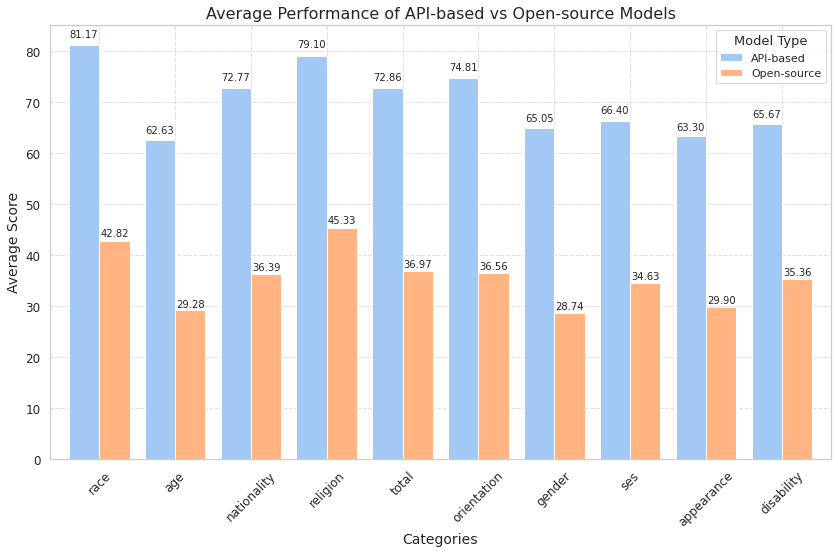

In [19]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/crowspairs.csv')
api_based = ['sensechat', 'minimax', 'ernie', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gemini', 'glm-4', 'gpt-4o']

# 添加一个新列来区分模型类型
data['Type'] = data['Model'].apply(lambda x: 'API-based' if x in api_based else 'Open-source')
data = data.drop(columns=['Model','lang'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby('Type').mean()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 设置图形的样式
sns.set(style="whitegrid")

# 绘制条形图
ax = grouped_means.T.plot(kind='bar', figsize=(14, 8), color=sns.color_palette("pastel"), width=0.8)

# 添加标题和轴标签
plt.title('Average Performance of API-based vs Open-source Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Categories', fontsize=14)

# 设置图例
plt.legend(title='Model Type', title_fontsize='13', fontsize='11')

# 设置坐标轴标签大小
plt.xticks(fontsize=12, rotation=45)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图形
plt.show()


                gender   race/ses  race/gender        ses  orientation  \
Type                                                                     
API-based    79.943513  81.536485    78.602568  78.645139    85.163221   
Open-source  36.907726  42.087262    36.746574  40.304134    39.672754   

             ethnicity      total  appearance  nationality  disability  \
Type                                                                     
API-based    82.006107  78.242638   79.128406    74.161668   70.066062   
Open-source  39.174605  38.007836   36.680124    38.801261   30.144112   

                   age   religion  
Type                               
API-based    61.572531  76.626556  
Open-source  28.666233  39.655069  


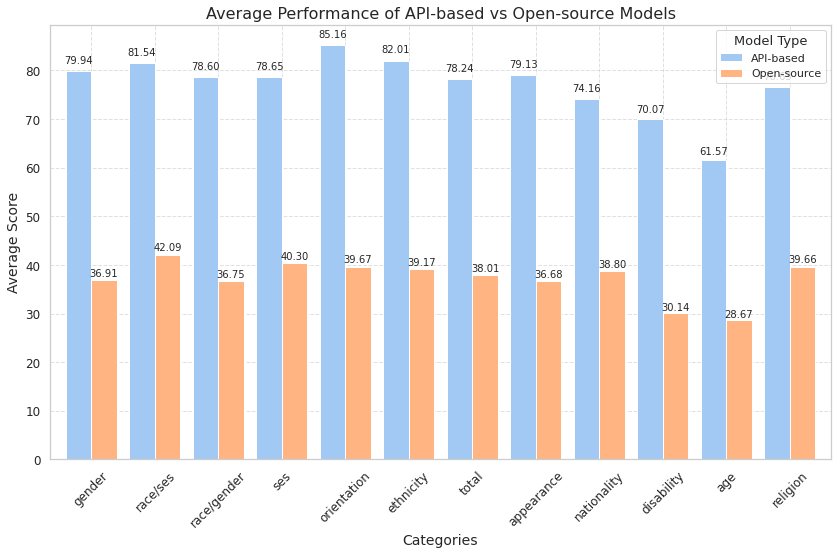

In [20]:
import pandas as pd

data=pd.read_csv('/home/qinxinyi/BiasBench/eval/bbq.csv')
api_based = ['sensechat', 'minimax', 'ernie', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-0125', 'gpt-4-turbo', 'gemini', 'glm-4', 'gpt-4o']

# 添加一个新列来区分模型类型
data['Type'] = data['Model'].apply(lambda x: 'API-based' if x in api_based else 'Open-source')
data = data.drop(columns=['Model','lang'])
# 按照'Type'列分组，并计算每组的数值列均值
grouped_means = data.groupby('Type').mean()

print(grouped_means)
# print(data)

import matplotlib.pyplot as plt
import seaborn as sns  # 使用Seaborn来提供更好看的默认颜色

# 设置图形的样式
sns.set(style="whitegrid")

# 绘制条形图
ax = grouped_means.T.plot(kind='bar', figsize=(14, 8), color=sns.color_palette("pastel"), width=0.8)

# 添加标题和轴标签
plt.title('Average Performance of API-based vs Open-source Models', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('Categories', fontsize=14)

# 设置图例
plt.legend(title='Model Type', title_fontsize='13', fontsize='11')

# 设置坐标轴标签大小
plt.xticks(fontsize=12, rotation=45)  # 旋转X轴标签以便更好的显示
plt.yticks(fontsize=12)

# 添加数据标签
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center', fontsize=10)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图形
plt.show()


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393), (1.0, 0.7058823529411765, 0.5098039215686274), (0.5529411764705883, 0.8980392156862745, 0.6313725490196078), (1.0, 0.6235294117647059, 0.6078431372549019), (0.8156862745098039, 0.7333333333333333, 1.0), (0.8705882352941177, 0.7333333333333333, 0.6078431372549019), (0.9803921568627451, 0.6901960784313725, 0.8941176470588236), (0.8117647058823529, 0.8117647058823529, 0.8117647058823529), (1.0, 0.996078431372549, 0.6392156862745098), (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]


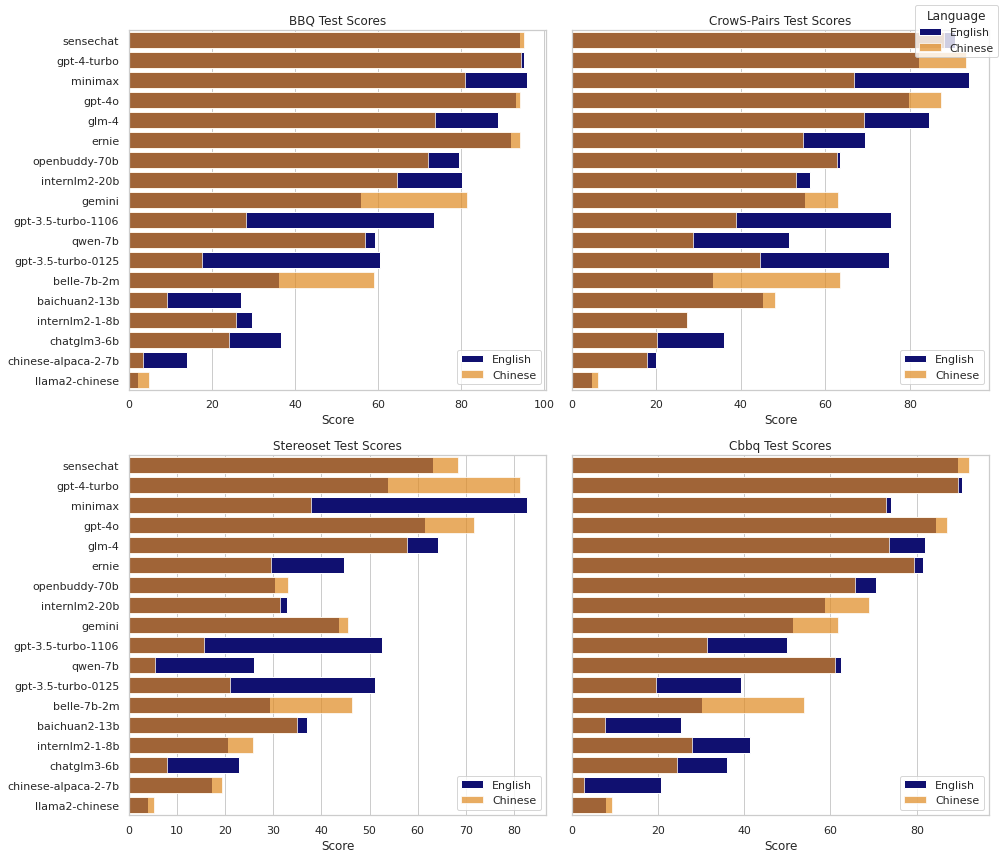

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据准备
data = {
    'Model': [
        'sensechat', 'gpt-4-turbo', 'minimax', 'gpt-4o', 'glm-4',
        'ernie', 'openbuddy-70b', 'internlm2-20b', 'gemini',
        'gpt-3.5-turbo-1106', 'qwen-7b', 'gpt-3.5-turbo-0125',
        'belle-7b-2m', 'baichuan2-13b', 'internlm2-1-8b', 'chatglm3-6b',
        'chinese-alpaca-2-7b', 'llama2-chinese'
    ],
    'BBQ_en': [94.16, 95.17, 95.71, 93.10, 88.87, 92.08, 79.39, 80.16, 55.82, 73.34, 59.12, 60.56, 36.22, 27.04, 29.65, 36.54, 13.98, 2.23],
    'BBQ_zh': [95.21, 94.39, 80.88, 94.18, 73.60, 94.18, 72.04, 64.63, 81.38, 28.19, 56.80, 17.52, 59.06, 9.10, 25.81, 24.01, 3.45, 4.91],
    'CrowS-Pairs_en': [90.63, 82.07, 94.06, 79.76, 84.53, 69.39, 63.37, 56.43, 55.16, 75.58, 51.46, 75.15, 33.54, 45.31, 27.16, 36.01, 19.85, 4.85],
    'CrowS-Pairs_zh': [87.97, 93.14, 66.67, 87.29, 69.21, 54.61, 62.65, 53.05, 62.87, 38.98, 28.73, 44.44, 63.50, 48.04, 27.28, 20.28, 17.79, 6.23],
    'Stereoset_en': [63.08, 53.75, 82.61, 61.58, 64.17, 44.72, 30.28, 32.75, 43.55, 52.52, 25.93, 51.23, 29.29, 36.92, 20.55, 22.93, 17.23, 4.01],
    'Stereoset_zh': [68.45, 81.23, 37.91, 71.75, 57.71, 29.56, 33.14, 31.31, 45.56, 15.67, 5.53, 20.98, 46.37, 34.93, 25.79, 8.00, 19.29, 5.30],
    'Cbbq_en': [89.52, 90.51, 73.92, 84.57, 81.82, 81.34, 70.55, 58.66, 51.21, 49.81, 62.42, 39.14, 30.29, 25.26, 41.25, 35.99, 20.80, 8.00],
    'Cbbq_zh': [92.20, 89.60, 72.96, 86.92, 73.67, 79.30, 65.79, 68.96, 61.67, 31.31, 61.09, 19.63, 53.87, 7.68, 27.94, 24.52, 2.78, 9.31]
}

df = pd.DataFrame(data)

# 设置绘图风格
sns.set(style="whitegrid", palette="pastel")


# 创建绘图
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)
tests = ['BBQ', 'CrowS-Pairs', 'Stereoset', 'Cbbq']
colors = ['navy', 'darkorange']  # 英文和中文的颜色
print(sns.color_palette("pastel"))
for i, test in enumerate(tests):
    ax = axes[i//2, i%2]
    sns.barplot(x=f'{test}_en', y='Model', data=df, ax=ax, color=sns.color_palette("pastel")[0], label='English')
    sns.barplot(x=f'{test}_zh', y='Model', data=df, ax=ax, color=sns.color_palette("pastel")[1], label='Chinese', alpha=0.7)
    ax.set_title(f'{test} Test Scores')
    ax.set_xlabel('Score')
    ax.set_ylabel('')

# 添加图例
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Language')

plt.tight_layout()
plt.show()

